# Introduction to Pandas

Pandas is by far the most commonly used primary Python tool for data analysis. It offers many tools for working with all kinds of data, and many packages are even built around the pandas tools. If you have worked with R before in another class, you are probably familiar with data frames. Pandas offers a DataFrame class of objects that has very similar properties to R data frames and will be the main method of storing tabular data (data with rows and columns).

If you'd like to read more about the libraries that we're loading here, <a href='https://pandas.pydata.org/docs/index.html'>take a look at the online documentation</a>




In [ ]:
import numpy as np 
import pandas as pd 

You can use the .head method for DataFrames to see the top few lines of the dataset. The rows represent individual observations, while the columns represent the variables. Note that there are row names as well as column names. The column names are the variable names, while the row names are by default just incrementing up from 0.# Reading in the Data Set
Before we can start analyzing data, we first need to actually bring in the data into Python so that we can work with it. We'll start by reading in a data set from a csv, or comma-separated value, file.

We use the `read_csv` function from pandas to read in the csv file.

In [ ]:
data_file = '201807-CAH_PulseOfTheNation_Raw.csv'
df = pd.read_csv(data_file)

You can use the .head method for DataFrames to see the top few lines of the dataset. The rows represent individual observations, while the columns represent the variables. Note that there are row names as well as column names. The column names are the variable names, while the row names are by default just incrementing up from 0.

In [ ]:
df.head()

<font style="color:red">**Question 1: Bring in the Codebook file as a DataFrame object called `codebook`. This should have two columns: the name of the variable in the dataset as well as the description of that variable. Look at the first few lines.**</font>

# Data from the internet

We can also bring in data from a URL. The Pulse of the Nation Data is available on their website and we can supply that URL directly to `read_csv()` in place of a file path. (you'll notice some slight differences in the formatting and colum names here, but these are otherwise identical)


In [ ]:

data_url = 'https://thepulseofthenation.com/downloads/201807-CAH_PulseOfTheNation_Raw.csv'
df_from_url = pd.read_csv(data_url)

In [ ]:
df_from_url.head()

# Exploring the Data Frame

There's a lot that you can do with Data Frames. The documentation for Data Frames (https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) describes all of the methods and instance variables associated with it. We'll go over a few here that are helpful for exploring and looking at the data.

First, let's check the number of rows and columns. We can do this by looking at the shape attribute of a data frame.

In [ ]:
df.shape

In [ ]:
df.columns

The codebook DataFrame has information about what question each of these variables correspond to.

To get more information about the contents of the Data Frame, we can also use the `.info()` method. This will give us the number of non-null values and the type of data (these have all been read in as integers) for each column.

In [ ]:
df.info()

Notice that the count of non-null objects is 800 for most, but much smaller for others. This indicates that there are a few rows with missing values. We'll discuss how to deal with missing values later, but this is a good way to identify which variables have missing values and how many there are.

We have already used the head method, but we can also use the tail methods in order to look at the last few rows of the data frame.

In [ ]:
df.tail()

In [ ]:
df.tail(10) # show additional rows

In [ ]:
df["gender"] 

In [ ]:
df.gender 

# Accessing Rows
What if we want to get certain rows? We can use bracket notation to get the rows we want.

In [ ]:
df[10:15] 

We can also use `loc` with square brackets. We use a colon to indicate that we want a series of indices with a start and end. We can also leave one side of the colon empty to indicate that we want the rest of the values on that end.

In [ ]:
df.loc[10:20] # rows labeled 10 - 20

In [ ]:
df.loc[:10]  # rows from the first to the label 10

In [ ]:
df.loc[:] # all rows

In addition, we can use loc to access certain columns as well as certain indices in the Data Frame.

In [ ]:
df.loc[10:20,"race"] 

And we can use similar notation to get a range of columns. This would give us the all columns from "gender" through "race" (inclusive)

In [ ]:
df.loc[10:20,'gender':'race']

In this case, we were able to use the `"-5:"` to indicate that we want the last 5 rows of the data frame. Note that we can't do the same with `.loc.` This is because `.loc` retrieves the rows from a particular label in the Data Frame, while `.iloc` retrieves them from particular positions.

# Data summaries

When we look individual columns, that itself is a Series object rather than a DataFrame object.

In [ ]:
type(df.gender)

In [ ]:
df.age.max()

In [ ]:
df.age.median()

<font style="color:red">**Question 2: What is the mean age of people in this dataset? What is the standard deviation of age**</font>

You can also use the `describe` method with DataFrames to calculate a lot of the summary statistics for numerical variables. In this dataset, we only have one, so we will only have one column.

In [ ]:
df.describe()

For categorical variables, you can use the `value_counts` method to create a frequency table

In [ ]:
df.race.value_counts()

To get the counts as proportions instead, use the `normalize=True` argument.

In [ ]:
df.race.value_counts(normalize=True)

And we can use the `value_counts` method on a data frame with multiple columns to count unique combinations of multiple variables.

In [ ]:
df[['gender', 'political_party']].value_counts()

<font style="color:red">**Question 3: What is the distribution of political party like? Which political party was the most common answer? What proportion of people said they didn't know or refused to answer?**</font>

# Subsetting

You can subset DataFrames using logical operators like `>`, `<`, `==` etc. For instance, if I wanted to get a list of all rows where `age` was over 40, I could write



In [ ]:
older_than_40 = df[df.age>40]
older_than_40.head()

And I can combine this behavior with the `value_counts` method to look at frequency tables for a particular subset of the data and compare them to each other.

In [ ]:
 df[df.age>40]['political_party'].value_counts(normalize = True)

In [ ]:
 df[df.age<=40]['political_party'].value_counts(normalize = True)

<font style="color:red">**Question 4:What is the average age of people who have a college degree or a graduate degree? What is the distribution of political party like for those people?**</font>

# Comparison between Variables

To do comparison between two categorical variables, we can use the `crosstab` function from pandas. This allows us to look at the breakdown of the number of people within the combinations of categories of multiple variables.



In [ ]:
pd.crosstab(df.political_party, df.gender)

To find the row proportion, we can use `normalize = 'index'`. Using `normalize='columns'` gives you the column proportions.

In [ ]:
pd.crosstab(df.political_party, df.gender, normalize='columns') # column proportions

In [ ]:
pd.crosstab(df.political_party, df.gender, normalize = 'index') # row proportions

<div class="alert alert-block alert-info">
<b>Tip:</b> When creating a crosstab, keep in mind that you can get very different results depending on the kind of proportions you analyze. Getting "row proportions" means you're calculating <b>"the proportion of people in [row category] who have [column characteristic]</b>, and getting "column proportions" means the reverse.

<font style="color:red">**Question 5: Create a crosstab that shows the the breakdown of party identification across different "races". Is racial identity associated with party ID?**</font>

If we want to look at the association between a numerical variable and a categorical variable, we can use the `pivot_table` method to calculate the value of some statistic of the numerical variable for each category of the categorical variable.

In [ ]:
df.pivot_table(values = 'age',index ='political_party')

By default, we will return the arithmetic mean, but we can supply the name (in quotation marks) of some other function to the `aggfunc` argument. 

For instance, to get the standard deviation of `age` for each party ID group, we would use `aggfunc='std'`

In [ ]:
df.pivot_table(values = 'age',index ='political_party', aggfunc = 'std')

Alternatively, we can supply the name of a custom function we write ourselves, or a `lambda` function defined inline. 

In [ ]:
# calculate the mean absolute deviation
def mean_abs_dev(x):
    x = np.array(x)
    mad = sum(abs(x - x.mean() )) / len(x)
    return mad

df.pivot_table(values = 'age',index ='political_party', aggfunc = mean_abs_dev)

# one-line equivalent with a lambda function: 
# df.pivot_table(values = 'age',index ='political_party', aggfunc = lambda x: sum(abs(np.mean(x)-x)/len(x)))

Finally, we can supply multiple functions in a list to get more than one aggregate in a table:

In [ ]:
# comparing the standard deviation to the mean absolute deviation:
df.pivot_table(values = 'age',index ='political_party', aggfunc = ["mean", mean_abs_dev, "std"])

<font style="color:red">**Question 6: What is the median age of respondents by their response to whether they supported Trump or not? Does there seem to be an association?**</font>

# Simple Visualizations

We can use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">`plot`</a> methods for DataFrames with these summaries to create simple visualizations. We'll discuss how to make nicer, more customizable graphs later, but for now, these should be very helpful in seeing relationships and exploring the data.

For a bar chart, you can use `plot.bar`.


In [ ]:
race_by_gender = pd.crosstab(df.race, df.gender, normalize = 'index')
race_by_gender.plot.bar()

<font style="color:red">**Question 7: Create a bar graph of education and political party. Does it look like there is a relationship based on the graph?**</font>

# Extra stuff: Example of using Pandas with an API response


Here's an example of using Pandas to do wrangle some data we got in last week's class. Here, we're getting average wage data by state and gender from the datausa API, but instead of using a dictionary comprehension to reformat the results we're using `json_normalize` to create a data frame, and `pivot_table` to create an easily readable table and then calculate and plot the gender wage gap by state.

In [261]:
from requests import get
datausa_base_url = 'https://datausa.io/api/data'
parameters = {'drilldowns': ['State', 'Gender'], 'measures':'Average Wage', "Year":2020}
gender_wage = get(datausa_base_url, params = parameters)
gdata = gender_wage.json()

In [263]:
# create a pandas data frame
gwdf = pd.json_normalize(gdata["data"])

In [281]:
# create a pivot table
gender_wage_table = gwdf.pivot_table(index = "State", columns = "Gender", values="Average Wage")

# calculate the % female wage compared to male by state
gender_wage_table["Wage Proportion"] =   gender_wage_table.Female /gender_wage_table.Male

# sort by wage gap and view the top 10
gender_wage_table.sort_values(by = "Wage Proportion").head()

Gender,Female,Male,Wage Proportion
State,,,
Utah,15079.849953,33005.452914,0.456890
Idaho,14093.790598,27082.682384,0.520399
Wyoming,16910.726348,31649.163659,0.534318
Louisiana,15256.735897,27217.985714,0.560539
Texas,17934.667712,31833.735971,0.563386


In [280]:
# bottom 10
gender_wage_table.sort_values(by = "Wage Proportion").tail()

Gender,Female,Male,Wage Proportion
State,,,
South Dakota,17773.608592,26121.454615,0.680422
Maine,19179.314980,26981.670903,0.710828
Vermont,21055.693782,28306.595406,0.743844
Puerto Rico,7019.665773,9329.782649,0.752393
District of Columbia,42328.561505,53192.917015,0.795756


<Axes: ylabel='State'>

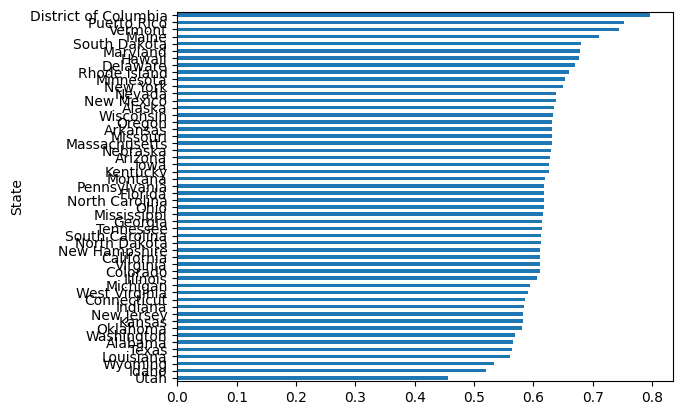

In [288]:
# now subset, sort and plot: 
gender_wage_table.sort_values(by = "Wage Proportion")["Wage Proportion"].plot.barh()